In [1]:
# CTree - 가장 오래된 방법.
# Model들이 아주 많이 있다. -> 어떨때 하는게 제일 나은지 판단을 하고 -> 함수를 만들어서 쓴다. 
# EDA 과정 : 탐색 데이터 분석 을 해야 머신러닝 예측력이나 모든 것들이 틀려진다. 
# SVM (Support Vector Machine) - 증권에서 많이 하는 것이다. (큰축)

In [2]:
# SVM의 기준선을 찾는것을 중점으로 하고 경계선이 어떤 부분이 제일 적합한지 
# 선형(예쁜) 비선형(못생긴) 분류로 가능
# 파라미터가 많지 않음
# 적은양도 데이터의 모델을 만들수 있음
# 딥러닝 이전 가장 진보됨 모형으로 평가
-----
# 문서 분류, 주가, 부도, 고객 구매, 안면 인식, 채권 등급 평가 예측을 할때 

ERROR: Error in parse(text = x, srcfile = src): <text>:8:0: 예상하지 못한 입력의 끝(end of input)입니다.
6: -----
7: # 문서 분류, 주가, 부도, 고객 구매, 안면 인식, 채권 등급 평가 예측을 할때 
  ^


# SVM (Support Vector Machine) 

In [3]:
# Not installed 구간에서 e1071를 검색후 설치하는 것이다.
library(e1071)

In [4]:
# 학습용, 검증용에 대한 Sampling 
# 범위를 정할 필요 없이 정해준다 (caret)
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [5]:
set.seed(1234)
# p = percentage , 0.7 = 70% 학습용으로 쓰겠다 // 나머지 30%는 검증용
samp <- createDataPartition(iris$Species, p = 0.7, list = F)


In [6]:
# 학습용
data.tr <- iris[samp,]
# 검증용
data.test <- iris[-samp,]

In [7]:
# 문제와 정답 만들기
x <- subset(data.test, select = -Species)
y <- data.test$Species

In [8]:
# 학습시키기 
# 앞으로 쓸때 시간 많이 걸릴것이다.
model <- svm(Species ~ ., data = data.tr)

In [10]:
# 검증하기
pred <- predict(model, x)

In [11]:
# 예측율
mean(pred == y)

[1] 0.9333333

In [12]:
# 오분류표
table(pred, y)
# setosa 다 맞추었고
# versicolor 1개 틀림
# virginica 2개 틀림 

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2        14

---
# 로지스틱 회귀분석

In [13]:
# 학습시키기 하기 위해 : 인공 신경망, 로지스틱 회귀분석...
library(nnet)

In [14]:
# 학습시키기
model <- multinom(Species ~ ., data = data.tr)

# weights:  18 (10 variable)
initial  value 115.354290 
iter  10 value 10.451001
iter  20 value 0.395906
iter  30 value 0.063643
iter  40 value 0.032814
iter  50 value 0.023376
iter  60 value 0.021200
iter  70 value 0.019040
iter  80 value 0.017101
iter  90 value 0.012218
iter 100 value 0.011383
final  value 0.011383 
stopped after 100 iterations


In [15]:
# 검증 하기
pred <- predict(model, x)

In [16]:
# 예측력
mean(pred == y)

[1] 0.9333333

In [17]:
# 오분류표
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2        14

----------
# 머신러닝 정리

In [18]:
# EX) Species 맞추는것을 하겠다?
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [19]:
# 어떤 모델이 나은지 볼때 --> 과정

### 1.Package 불러오기


In [20]:
# 인공신경망, 로지스틱 회귀 분석
library(nnet)

# 의사결정나무
library(party)

# 랜덤포레스트
library(randomForest)

# SVM
library(e1071)

# 마지막 Sampling
library(caret)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [22]:
# Sampling
samp <- createDataPartition(iris$Species, p = 0.7, list = F)

In [23]:
# 학습용 데이터
data.train <- iris[samp,]

In [24]:
# 검증용 데이터
data.test <- iris[-samp,]

In [25]:
# 문제 만들기
x <- subset(data.test, select = -Species)

In [26]:
# 정답 만들기
y <- data.test$Species

---
### 학습시키기

In [32]:
# 1. 인공신경망으로 학습시키기
model.nnet <- nnet(Species ~ ., data = data.train, size = 3)

# 2. 의사결정 나무로 학습시키기
model.ctree <- ctree(Species ~ ., data = data.train)

# 3. RandomForest로 학습시키기
model.randomForest <- randomForest(Species ~ ., data = data.train, ntree = 100)

# 4. SVM으로 학습시키기
model.svm <- svm(Species ~ ., data = data.train)

# 5. 로지스틱 회귀분석
model.multinom <- multinom(Species ~., data=data.train)

# weights:  27
initial  value 133.612097 
iter  10 value 113.562367
iter  20 value 47.334123
iter  30 value 26.860646
iter  40 value 5.244204
iter  50 value 4.445078
iter  60 value 4.438761
iter  70 value 4.438742
iter  80 value 4.438109
iter  90 value 4.438062
iter 100 value 4.437848
final  value 4.437848 
stopped after 100 iterations
# weights:  18 (10 variable)
initial  value 115.354290 
iter  10 value 11.185625
iter  20 value 4.636952
iter  30 value 4.469998
iter  40 value 4.449316
iter  50 value 4.445118
iter  60 value 4.444135
iter  70 value 4.442729
iter  80 value 4.442641
iter  90 value 4.442613
iter 100 value 4.442569
final  value 4.442569 
stopped after 100 iterations


---
# 검증하기

In [33]:
# 인공신경망
pred.nnet <- predict(model.nnet, x, type = "class")

# 의사결정나무
pred.ctree <- predict(model.ctree, x)

# RandomForest 
pred.randomForest <- predict(model.randomForest, x)

# SVM
pred.svm <- predict(model.svm, x)

# 로지스틱 회귀분석
pred.multinom <- predict(model.multinom, x)

---
# 예측력

In [35]:
forestcast <- rbind(mean(pred.nnet == y),
                    mean(pred.ctree == y),
                    mean(pred.randomForest == y),
                    mean(pred.svm == y),
                    mean(pred.multinom == y)
                   )

rownames(forestcast) <- c("인공신경망", "의사결정나무", "랜덤포레스트", "SVM",
                         "로지스틱 회귀분석")
colnames(forestcast) <- c("예측력")
forestcast

,예측력
인공신경망,0.9555556
의사결정나무,0.9555556
랜덤포레스트,0.9555556
SVM,0.9555556
로지스틱 회귀분석,0.9555556


----
# Mushroom

In [36]:
# https://archive.ics.uci.edu/ml/datasets/Student+Performance
# 위의 사이트에서 Data 가져올수 있다 

- 8124종류의 버섯의 특징과 독의 유무를 정리해논 데이터셋
- 버섯 모양의 특징을 기반으로 독의 유무를 판단

- # Data의 한 row
한줄(row)이 버섯 한 종류 

첫 번쨰 컬럼은 독의 유무 : 독(p), 식용(e) <- iris와 같다
두 번째 컬럼은 버섯의 머리모양 : b(벨형태), c(원뿔모양), x(볼록형태), f(평평한 형태), k(혹모양), s(오목형태)
세 번째 컬럼 포기
네 번째 컬럼은 버섯의 머리색 : n(갈색), b(황갈색), c(연한갈색), g(회색)
자세한 내용은 사이트 참조

# RandomForest를 이용한 버섯 분류

In [49]:
# 컬럼 침범시 
mr <- read.csv("../Data/mushroom.csv", header = F)
head(mr)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [41]:
# 다 Factor네? --> 문제 ( Target 컬럼빼고는 다 숫자여야 machine learning 사용 가능)
str(mr)

'data.frame':	8124 obs. of  23 variables:
 $ V1 : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ V2 : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ V3 : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ V4 : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ V5 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ V6 : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ V7 : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ V8 : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ V9 : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ V10: Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ V11: Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ V12: Factor w/ 5 levels "?","b","c","e",..: 4 3 3 4 4 3 3 3 4 3 ...
 $ V13: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V14: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 9 levels "b","c"

In [44]:
# Na 확인
colSums(is.na(mr))

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V21 V22 V23 
  0   0   0

In [45]:
# 머신러닝을 위해 문자를 숫자로 변환하는 작업. 
# 인터넷 -> String 을 Factor 없이 불러라 하는 것들은 쓰레기들. 
# 이유 : 문자가 숫자와 같이 있기 때문에 
# Factor 부르는게 훨씬 편하다. 

In [46]:
# Factor 안쓰고 해보자 한번 어떤문제가 있을지 확인
# 숫자를 확인할수 없다.
mr <- read.csv("../Data/mushroom.csv", header = F, stringsAsFactors = F)
head(mr)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [47]:
str(mr)

'data.frame':	8124 obs. of  23 variables:
 $ V1 : chr  "p" "e" "e" "p" ...
 $ V2 : chr  "x" "x" "b" "x" ...
 $ V3 : chr  "s" "s" "s" "y" ...
 $ V4 : chr  "n" "y" "w" "w" ...
 $ V5 : chr  "t" "t" "t" "t" ...
 $ V6 : chr  "p" "a" "l" "p" ...
 $ V7 : chr  "f" "f" "f" "f" ...
 $ V8 : chr  "c" "c" "c" "c" ...
 $ V9 : chr  "n" "b" "b" "n" ...
 $ V10: chr  "k" "k" "n" "n" ...
 $ V11: chr  "e" "e" "e" "e" ...
 $ V12: chr  "e" "c" "c" "e" ...
 $ V13: chr  "s" "s" "s" "s" ...
 $ V14: chr  "s" "s" "s" "s" ...
 $ V15: chr  "w" "w" "w" "w" ...
 $ V16: chr  "w" "w" "w" "w" ...
 $ V17: chr  "p" "p" "p" "p" ...
 $ V18: chr  "w" "w" "w" "w" ...
 $ V19: chr  "o" "o" "o" "o" ...
 $ V20: chr  "p" "p" "p" "p" ...
 $ V21: chr  "k" "n" "n" "k" ...
 $ V22: chr  "s" "n" "n" "s" ...
 $ V23: chr  "u" "g" "m" "u" ...


In [51]:
# 머신러닝을 위해 문자를 숫자로 변환하는 작업. 
# as.numeric(mr$V2)
as.numeric(mr[,2])

[1] 6 6 1 6 6 6 1 1 6 1 6 6 1 6 6 5 3 6 6 6 1 6 1 1 1 3 6 6 3 6 1 6 6 6 1 6 5
  [38] 6 6 1 1 6 6 6 6 6 6 6 6 3 6 6 1 6 6 1 3 1 6 6 5 1 1 1 1 3 6 3 6 6 3 1 3 6
  [75] 1 3 6 3 6 3 6 6 3 6 6 6 1 6 3 5 6 1 6 6 6 6 3 6 1 6 6 1 3 6 1 6 6 1 1 6 6
 [112] 5 6 6 6 6 5 6 6 5 6 6 3 3 6 6 1 3 6 1 1 1 3 6 3 6 3 6 6 1 6 1 5 3 6 6 3 6
 [149] 1 1 6 6 6 5 6 6 1 6 1 1 1 1 6 3 6 3 1 1 6 1 6 1 6 1 3 1 1 1 6 1 6 5 3 6 3
 [186] 6 1 3 1 6 6 6 1 3 6 3 1 6 6 3 6 1 6 6 3 6 1 1 1 1 6 1 6 6 3 1 6 6 6 5 6 6
 [223] 6 3 6 1 6 6 6 1 6 6 6 3 1 6 6 1 6 3 3 6 6 6 3 6 6 6 3 6 3 6 5 1 1 1 3 6 1
 [260] 1 3 6 6 6 3 3 3 6 1 3 6 3 6 6 3 6 3 6 3 6 6 1 5 6 1 3 1 1 6 3 6 1 6 1 6 1
 [297] 6 6 3 6 6 1 6 1 6 6 1 6 3 6 6 6 6 6 1 6 6 6 6 3 6 3 6 1 6 1 6 6 1 1 6 1 1
 [334] 1 6 6 6 1 6 6 6 1 6 3 1 6 6 6 3 6 3 3 1 1 6 5 3 6 6 6 6 6 3 3 6 3 6 6 1 6
 [371] 6 3 6 5 6 1 5 1 6 1 6 6 6 1 6 6 6 6 1 6 1 6 1 6 3 6 6 6 6 6 1 1 6 1 6 6 1
 [408] 6 6 6 6 6 6 6 6 1 6 6 6 3 6 1 6 3 6 6 3 1 6 3 6 6 1 1 3 1 6 6 1 6 6 6 6 6
 [445] 6 6 6 3 1 6 6 1 1 6 1 6 1 1 3 3 6 3 1 6 6 3 6 6 1 3 6 6 3 5 3 3 6 1 6 1 1
 [482] 1 3 3 3 3 6 5 6 6 3 3 6 3 6 1 3 3 6 1 6 1 6 1 1 6 6 3 6 3 3 1 6 5 6 6 6 1
 [519] 6 6 6 1 3 6 3 1 3 6 6 3 6 6 6 3 3 6 1 5 6 3 6 3 6 6 3 6 1 3 6 6 3 6 6 3 6
 [556] 3 6 6 6 6 1 6 6 6 1 6 6 3 6 1 6 3 6 1 6 6 6 6 6 6 6 6 6 6 3 6 5 3 5 6 6 6
 [593] 6 6 6 6 1 1 6 6 6 6 3 3 1 1 6 3 6 3 3 6 3 6 6 1 3 1 1 5 3 1 6 3 3 6 3 5 1
 [630] 1 3 1 6 6 6 1 3 6 6 6 1 6 3 3 3 6 1 1 6 3 6 1 3 6 6 6 3 1 6 3 1 6 6 6 1 1
 [667] 3 6 3 6 6 3 3 6 3 3 3 6 6 1 6 6 6 1 6 6 3 1 6 6 1 1 6 3 6 1 1 6 6 3 6 3 6
 [704] 1 3 3 1 5 6 1 3 3 6 1 1 1 1 6 6 5 3 6 3 6 3 6 6 6 1 6 3 6 6 6 6 1 6 6 6 6
 [741] 6 1 6 1 3 6 1 1 6 3 6 1 3 1 1 1 3 6 1 6 1 3 6 6 6 3 6 3 1 1 6 1 6 6 3 6 6
 [778] 6 6 1 6 5 1 6 6 6 6 6 6 6 1 3 6 6 6 6 1 6 6 6 1 6 6 1 1 3 1 6 1 6 1 1 6 6
 [815] 6 6 6 6 6 1 1 6 1 6 6 6 3 3 6 3 5 3 6 6 6 6 6 6 6 6 3 6 1 5 6 6 6 1 1 6 1
 [852] 3 5 6 5 3 3 1 1 6 3 6 3 6 6 6 3 3 6 6 3 6 6 6 6 6 6 6 3 1 3 3 6 6 3 6 6 3
 [889] 6 6 6 3 6 1 6 6 1 6 6 6 3 6 6 6 6 3 3 6 3 6 1 6 6 3 6 6 6 6 3 6 3 6 6 6 3
 [926] 6 6 6 6 1 6 3 3 6 6 3 6 6 3 6 1 6 6 6 3 3 3 1 3 3 6 1 3 6 3 1 6 6 3 6 6 3
 [963] 6 6 3 3 3 6 6 6 3 6 3 6 3 6 1 6 6 3 3 6 3 6 6 6 3 6 6 6 6 6 6 3 3 3 6 3 1
[1000] 3 6 3 3 6 6 6 6 3 6 6 6 6 3 3 3 3 3 6 3 6 3 1 1 6 3 3 6 3 6 6 6 6 6 3 6 3
[1037] 6 3 6 6 6 3 6 6 6 6 6 3 6 6 6 6 6 6 6 1 6 3 6 6 3 6 6 6 3 3 6 3 6 6 6 3 6
[1074] 6 3 3 3 3 3 6 3 3 1 3 1 3 1 6 3 6 5 6 3 3 6 3 6 6 6 6 6 3 6 6 3 3 6 3 1 6
[1111] 3 3 6 3 3 3 3 3 3 6 6 3 6 6 3 6 3 1 6 6 3 6 6 3 6 6 6 1 3 6 3 6 3 6 6 6 3
[1148] 6 6 3 3 3 6 3 6 1 6 3 3 3 1 6 6 6 6 1 6 6 3 1 6 6 3 6 6 6 1 3 6 3 6 6 3 6
[1185] 6 3 3 3 6 6 6 6 6 3 1 6 6 1 6 1 6 6 1 3 3 3 3 3 3 6 6 3 3 6 6 3 6 3 3 3 6
[1222] 6 6 3 3 6 6 6 6 6 6 3 3 6 3 3 3 3 6 6 3 6 6 3 3 6 3 6 3 3 6 6 3 3 3 6 3 3
[1259] 3 3 3 3 3 6 6 3 3 3 6 6 3 6 3 3 6 3 6 3 6 3 1 6 6 6 6 3 6 3 6 3 6 6 6 3 3
[1296] 6 6 6 6 3 6 6 3 6 3 3 3 3 3 3 3 3 3 6 1 3 3 6 1 6 3 6 3 3 6 3 1 3 6 3 6 3
[1333] 3 3 3 6 6 6 6 3 6 3 3 3 3 3 3 6 6 6 6 3 3 3 6 3 6 3 3 3 3 3 3 3 6 3 6 3 6
[1370] 3 3 6 6 1 6 3 3 3 3 3 6 3 3 3 3 6 3 6 6 6 6 6 3 6 3 6 6 6 3 3 3 3 6 3 6 3
[1407] 6 6 3 3 6 3 3 6 3 3 6 6 6 3 6 6 6 3 6 3 3 6 3 3 6 6 3 6 3 6 1 3 3 6 6 6 3
[1444] 3 3 3 6 3 6 3 3 3 6 3 6 3 6 6 6 3 6 6 3 6 6 6 6 6 3 6 6 3 3 3 6 3 3 6 3 6
[1481] 3 6 6 6 3 6 6 3 6 3 3 3 3 6 6 3 3 6 6 6 3 1 3 6 3 6 3 6 6 6 6 3 3 6 6 3 3
[1518] 3 1 6 6 3 6 6 6 6 6 3 6 6 3 3 3 3 3 6 6 6 6 3 3 6 6 6 6 6 3 3 6 6 3 1 3 3
[1555] 3 3 6 1 3 3 6 3 6 6 1 6 3 6 3 3 3 6 6 3 6 3 6 6 3 3 3 6 6 3 3 6 6 6 6 3 3
[1592] 6 3 3 6 3 6 6 3 6 6 3 3 3 3 3 3 6 6 6 6 3 6 3 3 6 6 3 6 6 6 3 3 3 6 3 6 6
[1629] 3 3 3 3 3 3 6 3 3 3 3 6 6 6 6 3 3 6 6 3 6 6 6 6 6 6 6 3 6 3 3 6 3 6 6 6 6
[1666] 6 6 6 6 3 6 6 3 6 3 6 6 3 3 6 1 6 6 3 3 3 3 3 6 6 6 6 3 3 3 6 3 3 6 6 6 3
[1703] 3 3 6 6 3 3 3 6 6 6 6 6 3 6 6 6 3 3 3 3 6 6 1 3 6 3 6 6 3 6 3 6 3 6 6 6 3
[1740] 3 6 3 3 6 3 3 6 3 3 3 6 3 6 6 3 3 3 6 6 6 6 6 3 6 6 6 3 6 6 6 6 6 6 6 6 6
[1777] 6 3 3 6 6 3 6 3 1 6 3 6 6 6 3 3 6 3 6 3 6 3 3 3 3 6 6 6 3 3 3 6 6 6 3 3 6
[1814] 6 6 6 6 3 3 6 3 6 6 3 6 3 6

In [53]:
# 전부다 숫자로 for문 돌려서 바꿔야함.
for (i in 2:ncol(mr)){
    mr[,i] <- as.numeric(mr[,i])
}
head(mr)
# 지금 V1 은 Target column인데 Vector고 나머지는 ?

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
p,6,3,5,2,7,2,1,2,5,...,3,8,8,1,3,2,5,3,4,6
e,6,3,10,2,1,2,1,1,5,...,3,8,8,1,3,2,5,4,3,2
e,1,3,9,2,4,2,1,1,6,...,3,8,8,1,3,2,5,4,3,4
p,6,4,9,2,7,2,1,2,6,...,3,8,8,1,3,2,5,3,4,6
e,6,3,4,1,6,2,2,1,5,...,3,8,8,1,3,2,1,4,1,2
e,6,4,10,2,1,2,1,1,6,...,3,8,8,1,3,2,5,3,3,2


In [54]:
#  1. 먼저 library(dplyr) 불러야함 --> 정렬을 위해 arrange
library(dplyr)



Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [57]:
#  2.  V1 기준으로 p와 e로 정렬을 한다.

mr <- arrange(mr, V1)
head(mr)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
e,6,3,10,2,1,2,1,1,5,...,3,8,8,1,3,2,5,4,3,2
e,1,3,9,2,4,2,1,1,6,...,3,8,8,1,3,2,5,4,3,4
e,6,3,4,1,6,2,2,1,5,...,3,8,8,1,3,2,1,4,1,2
e,6,4,10,2,1,2,1,1,6,...,3,8,8,1,3,2,5,3,3,2
e,1,3,9,2,1,2,1,1,3,...,3,8,8,1,3,2,5,3,3,4
e,1,4,9,2,4,2,1,1,6,...,3,8,8,1,3,2,5,4,4,4


In [58]:
#  3.  p가 마지막에 있냐? rownames 가 잘 구성됫나 확인을 위해...
tail(mr)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
8119,p,4,4,3,1,9,2,1,2,1,...,2,7,7,1,3,2,1,8,5,1
8120,p,3,4,2,1,5,1,1,1,12,...,4,2,2,1,3,1,4,8,2,1
8121,p,4,4,5,1,8,2,1,2,1,...,2,7,8,1,3,2,1,8,5,3
8122,p,4,3,3,1,9,2,1,2,1,...,3,7,8,1,3,2,1,8,5,1
8123,p,4,4,5,1,3,2,1,2,1,...,3,7,8,1,3,2,1,8,5,1
8124,p,4,4,5,1,9,2,1,2,1,...,2,8,8,1,3,2,1,8,5,3


In [59]:
# V1컬럼이 Target이 될수 있을지 확인한다. 
# p와 e가 정상적으로 잘 분포되어 있는지 

# 개수 먼저 파악한다 ******

# 식용 버섯의 개수
nrow(subset(mr, V1 == "e"))
# 독버섯의 개수
nrow(subset(mr, V1 == "p"))

# 확인 작업
nrow(subset(mr, V1 == "p")) / nrow(subset(mr, V1 == "e"))
# 상관 없으니까 해도 되겠다. 
# 비율이 6:4 정도 되면 애매해서 사용 불가.

[1] 4208

[1] 3916

[1] 0.9306084

### mr$V1은 Target Column으로 적합

In [63]:
# Sampling 해봐라
set.seed(1234)
samp <- createDataPartition(mr$V1, p = 0.7, list = F)

In [64]:
# 학습용 데이터
data.train <- mr[samp,]
# 검증용 데이터
data.test <- mr[-samp,]

In [66]:
# 문제 만들기
x <- subset(data.test, select = -V1)
# 정답 만들기
y <- data.test$V1



# 1. 인공신경망으로 학습시키기
mrmodel.nnet <- nnet(V1 ~ ., data = data.train, size = 3)

# 2. 의사결정 나무로 학습시키기
mrmodel.ctree <- ctree(V1 ~ ., data = data.train)

# 3. RandomForest로 학습시키기
mrmodel.randomForest <- randomForest(V1 ~ ., data = data.train, ntree = 100)

# 4. SVM으로 학습시키기
mrmodel.svm <- svm(V1 ~ ., data = data.train)

# 5. 로지스틱 회귀분석
mrmodel.multinom <- multinom(V1 ~., data=data.train)




# 인공신경망
mrpred.nnet <- predict(mrmodel.nnet, x, type = "class")

# 의사결정나무
mrpred.ctree <- predict(mrmodel.ctree, x)

# RandomForest 
mrpred.randomForest <- predict(mrmodel.randomForest, x)

# SVM
mrpred.svm <- predict(mrmodel.svm, x)

# 로지스틱 회귀분석
mrpred.multinom <- predict(mrmodel.multinom, x)


# RandomForest로 예측력 확인하기

mr.forestcast <- rbind(mean(mrpred.nnet == y),
                    mean(mrpred.ctree == y),
                    mean(mrpred.randomForest == y),
                    mean(mrpred.svm == y),
                    mean(mrpred.multinom == y)
                   )

rownames(mr.forestcast) <- c("인공신경망", "의사결정나무", "랜덤포레스트", "SVM",
                         "로지스틱 회귀분석")
colnames(mr.forestcast) <- c("예측력")
mr.forestcast


# weights:  73
initial  value 4093.357313 
iter  10 value 3256.314817
iter  20 value 2689.126503
iter  30 value 1650.792229
iter  40 value 1412.243015
iter  50 value 1218.638478
iter  60 value 1080.163179
iter  70 value 919.089688
iter  80 value 883.690127
iter  90 value 869.196803
iter 100 value 850.491812
final  value 850.491812 
stopped after 100 iterations


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘V17’ constant. Cannot scale data.”

# weights:  24 (23 variable)
initial  value 3942.621163 
iter  10 value 1633.673376
iter  20 value 1264.137543
iter  30 value 868.476686
iter  40 value 789.424077
iter  50 value 785.517204
final  value 785.517135 
converged


,예측력
인공신경망,0.9507389
의사결정나무,1.0000000
랜덤포레스트,1.0000000
SVM,1.0000000
로지스틱 회귀분석,0.9671593


In [95]:
# 오분류표 확인하기
odata <- cbind(as.data.frame(table(mrpred.nnet, y)), as.data.frame(table(mrpred.ctree, y))[,3]
     , as.data.frame(table(mrpred.randomForest, y))[,3], as.data.frame(table(mrpred.svm, y))[,3]
     , as.data.frame(table(mrpred.multinom, y))[,3])
colnames(odata)<- c("문제","정답","인공신경망", "의사결정나무", "랜덤포레스트", "SVM",
                         "로지스틱 회귀분석")
odata

문제,정답,인공신경망,의사결정나무,랜덤포레스트,SVM,로지스틱 회귀분석
e,e,1259,1262,1262,1262,1226
p,e,3,0,0,0,36
e,p,117,0,0,0,44
p,p,1057,1174,1174,1174,1130


---
# 타이타닉 데이터를 활용한 탐습자의 생사여부 예측


### - EDA(Exploratory Data Analysis): 탐색적 데이터 분석

In [100]:
train_df <- read.csv("../Data/Titanic_train.csv", fileEncoding = "euc-kr")
head(train_df)
# Survived - 0 Deadth , 1 - Alive

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [101]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [102]:
str(train_df)
# 'data.frame':	891 obs 
#  Name       : Factor w/ 891 같은 개수니까 이름 중복 안되네?
#  Pclass     : int  3 1 3 1 3 3 1 3 3 2 .
#  Sex        : Factor w/ 2 levels 
#  Ticket     : Factor w/ 681 levels 
#  Cabin      : Factor w/ 148 levels "" 빈값이 있네?
# Embarked   : Factor w/ 4 levels  3군데 인데? 4개로 되있네;?

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 354 273 16 555 516 625 413 577 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### 컬럼 내용 확인
- Survived : 생존 여부 , 0 = 사망, 1 = 생존
- Pclass : 티켓등급, 1 = First, 2 = Second, 3 = Third
- SibSp: 함께 탑승한 형제, 자매, 배우자의 수 (Sibling)
- Parch : 함께 탑승한 부모, 자식의 수 (Parents and Children)
- Fare : 운임 
- Cabin : 객실번호 (C148까지만 있다. Third Class는 객실번호 없음.)
- Embarked : 탑승항구(3군데 인데 4개) , C = Chersbourg, Q = Queenstown, S = Southampton

In [103]:
# 제일 처음 할것 ****** 
# Note 나 Postit에 적으면서 꼭 해야한다 !!!!!

# 처음으로 할일 
# NA 확인
# Cabin, Embarked 빈값이 있는데 --> Na로 count안되있네??
colSums(is.na(train_df))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [104]:
# Age 컬럼의 분석 가부 확인
# Age = 177 인데 전체 891
177 / 891
# 20 % 넘으면 쓰면 안되는 데이터이다. 
# 애매한 데이터 이다. Age column

[1] 0.1986532

In [107]:
# Age 컬럼 중 Na를 제거하고 데이터셋 만들기
# na 인것만 가지고 만든것
# subset(train_df, is.na(train_df$Age))
# na 빼고 만들기
head(subset(train_df, !is.na(train_df$Age)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


In [108]:
# Survived ==> Target Column으로 둘거다
# 적합한지 확인을 한다


In [110]:
# Survived 기준으로 정렬
train_df <- arrange(train_df, Survived)
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [111]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


### Survived의 Target Column 적합 여부 확인

In [153]:
# 생존자수 
nrow(subset(train_df, Survived == "1"))

# 사망자수
nrow(subset(train_df, Survived == "0"))

# 비율

# 생존자
alive <- round(nrow(subset(train_df, Survived == "1"))/ nrow(train_df),4) * 100
# 사망자
death <- round(nrow(subset(train_df, Survived == "0"))/ nrow(train_df),4) * 100

# 결과 --> 6:4 나오면 쓸수 없다. 근데 이 결과는 애매한 결과표이다. 
titanic.ratio <- cbind("사망" =death,"생존" = alive)
titanic.ratio


[1] 342

[1] 549

사망,생존
61.62,38.38


In [154]:
# 결과가 애매하게 나왔으나 시도한다. 
# 애매한 이유 : Target Column(6:4)의 결과는 아니라서 일단은 합격.

In [155]:
# Library 불러와야함  --> 3D Pie Chart
library(plotrix)

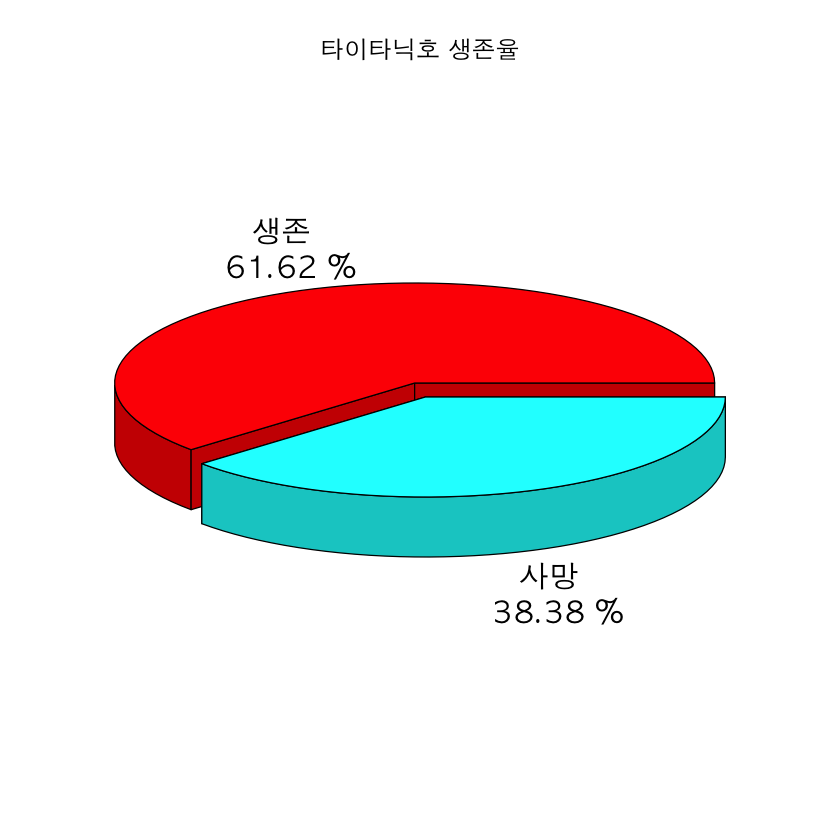

In [156]:
# 생존과 사망 비율을 Pie Chart로 생성
# for mac
options(warn = -1)
par(family = "AppleGothic")


pie3D(titanic.ratio, 
      main = "타이타닉호 생존율",
      explode = 0.05,
      labels = paste(c("생존","사망"), "\n", titanic.ratio,"%")

   )

In [163]:
# 생존과 사망 비율을 Pie Chart로 생성  ------ TEACHER
# for mac
options(warn = -1)
par(family = "AppleGothic")

deathCount <- sum(train_df$Survived == 0)
liveCount <- sum(train_df$Survived == 1)
SurvivedVector <- c(deathCount, liveCount)
SurvivedVector

[1] 549 342

In [150]:
# Ratio 만들기
ratio <- round(SurvivedVector / sum(SurvivedVector) * 100, 2)
label <- paste(c("사망", "생존"), "\n" , ratio, "%")
label

[1] "사망 \n 61.62 %" "생존 \n 38.38 %"

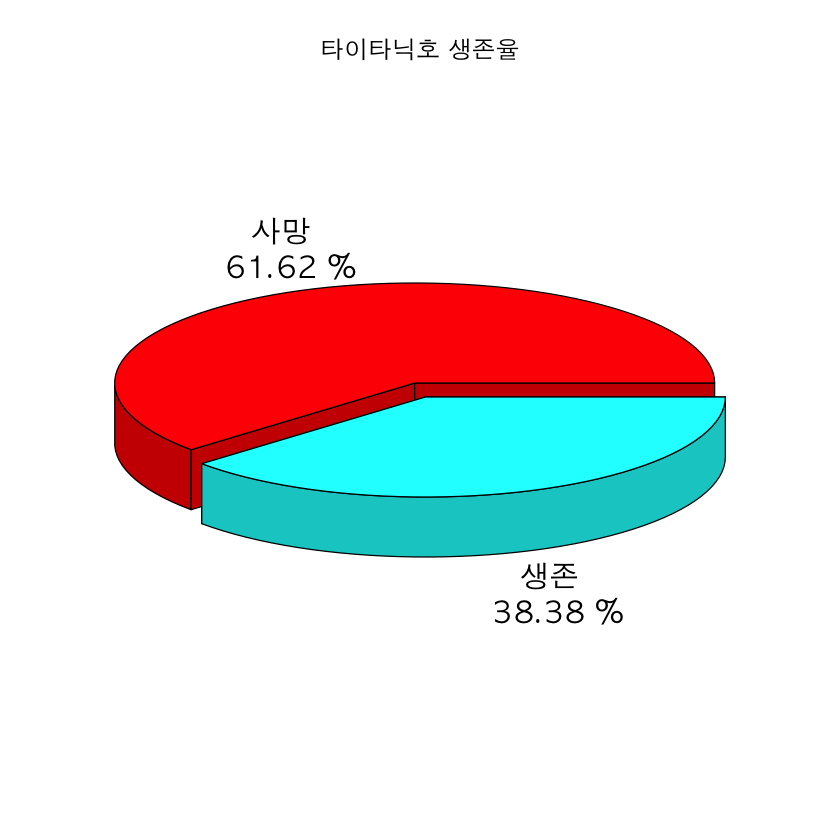

In [152]:
# for mac
options(warn = -1)
par(family = "AppleGothic")
pie3D(SurvivedVector, 
      main = "타이타닉호 생존율",
      explode = 0.05,
      labels = label

   )

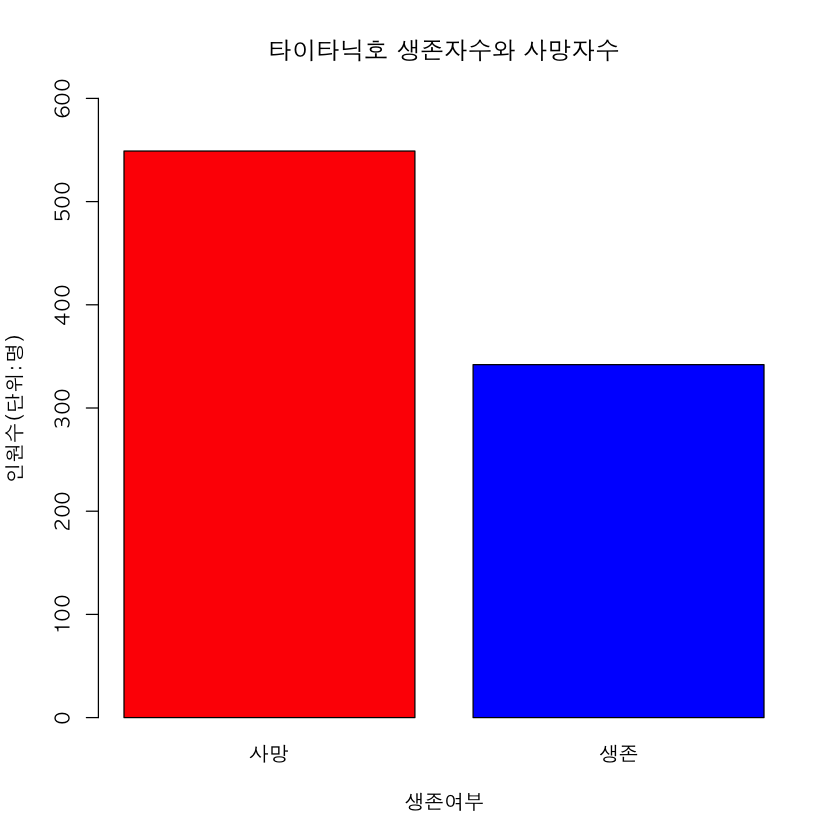

In [166]:
# 막대그래프로 생존수와 사망자수 시각화

par(family = "AppleGothic")
options(scipen = 100) # 지수 지우기

barplot(SurvivedVector,
        beside =T,
        main = '타이타닉호 생존자수와 사망자수',
        ylim = c(0,600),
        col = c('red', 'blue' ),
        xlab = '생존여부',
        ylab = '인원수(단위:명)',
        names = c('사망','생존')
       )

In [167]:
# 타겟을 잡음
# [Survived] <- [] 

In [168]:
head(train_df)
# Name, Ticket X 지울것그러나 

# Pclass 3 종류
# 그 다음으로 쉽게 접근할수 있는것 Sex 2종류 
# ..
# 분류가 제일 쉬울것 같은 것을 정해서 해야한다. 
# Sex 가 제일 쉬운지 써먹을 수있는지 찾아서 해야함.

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


### Feature Column 구성을 위해 Sex컬럼 분석


In [169]:
# Sex Column 분류
unique(train_df$Sex)
# 두 종류인지 정확하게 확인하기 위해서 쓰는 것이다. 

[1] male   female
Levels: female male

In [172]:
# 특징이 있는지 확인을 한다 50:50이면 의미없는 데이터이다
# 여성 인원과 남성인원 확인
maleCount <- nrow(subset(train_df, Sex == "male"))
femaleCount <- nrow(subset(train_df, Sex == "female"))
maleCount
femaleCount

[1] 577

[1] 314

여성과 남성의 승선 비율이 차이가 나서 Feature로 사용하기에 충분하다   ---> XXXXXXXX

In [177]:
# 이유 : 여성의 생존과 사망 인원 
femaleSurvive <- nrow(subset(train_df, Sex == "female" & Survived == "1"))
femaleDeath <- nrow(subset(train_df, Sex == "female" & Survived == "0"))

femaleSurvive
femaleDeath

[1] 233

[1] 81

In [178]:
# 이유 : 남성 생존과 사망 인원 
maleSurvive <- nrow(subset(train_df, Sex == "male" & Survived == "1"))
maleDeath <- nrow(subset(train_df, Sex == "male" & Survived == "0"))

maleSurvive
maleDeath

[1] 109

[1] 468

Sex 컬럼은 Feature Column으로 충분하다.          
[Survived] <- [Sex]

-----

In [187]:
# 여성의 생존율과 사망율
paste("여성의 생존율 : ",round(femaleSurvive / femaleCount * 100,2), "%")

paste("여성의 사망율 : ",round(femaleDeath / femaleCount * 100,2), "%")


[1] "여성의 생존율 :  74.2 %"

[1] "여성의 사망율 :  25.8 %"

In [192]:
# 남성의 생존율과 사망율
paste("남성의 생존율 : ",round(maleSurvive / maleCount * 100,2), "%")
paste("남성의 사망율 : ",round(maleDeath / maleCount * 100,2), "%")


[1] "남성의 생존율 :  18.89 %"

[1] "남성의 사망율 :  81.11 %"

### 남성과 여성의 비율이 반대로 되있으니까 --> 좋은 데이터 이다.

---

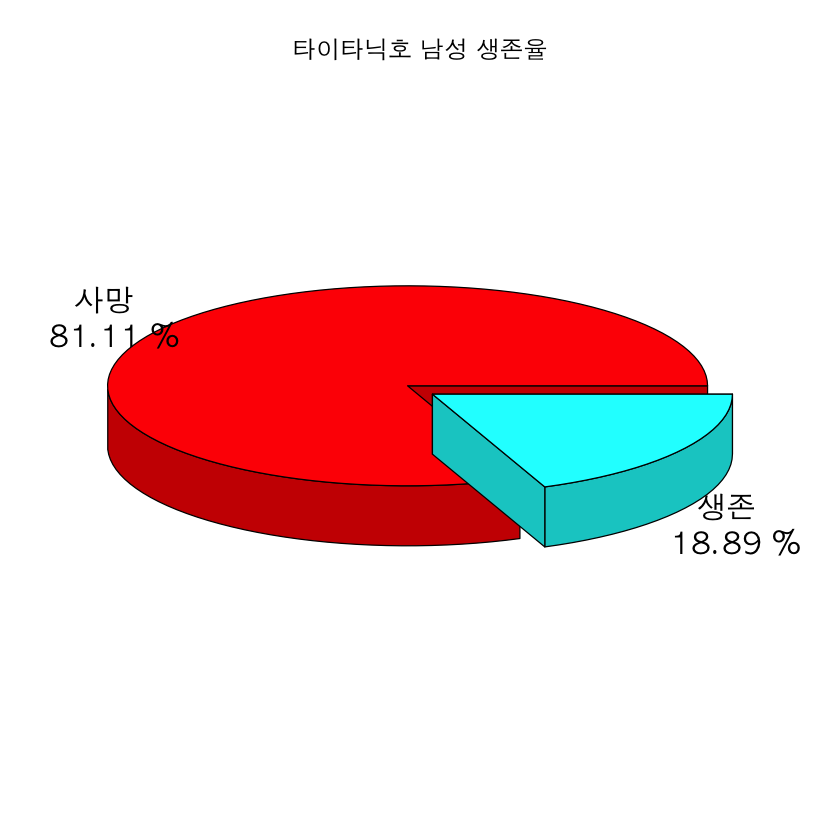

In [195]:
# 남성의 생존율과 사망율 PieChart

par(family = "AppleGothic")
options(scipen = 100) # 지수 지우기


SurvivedVector <- c(maleDeath, maleSurvive)
ratio <- round(SurvivedVector / maleCount * 100, 2)
label <- paste(c("사망", "생존"), "\n", ratio, "%") 

pie3D(SurvivedVector,
      main = "타이타닉호 남성 생존율",
      labels = label,
      explode = 0.05
     )

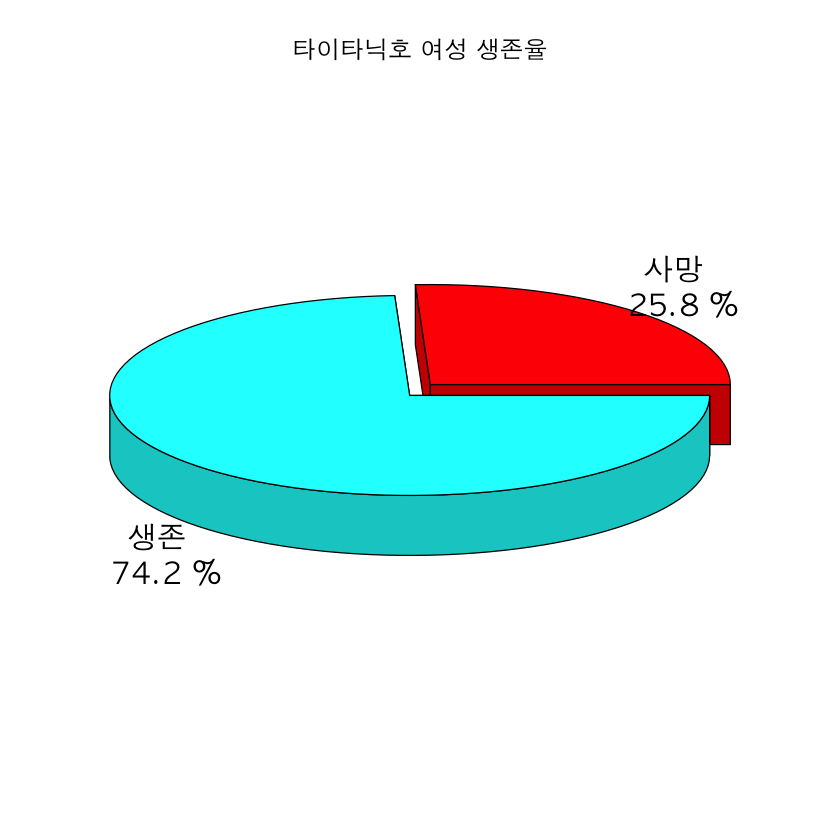

In [196]:
# 여성의 생존율과 사망율 PieChart

par(family = "AppleGothic")
options(scipen = 100) # 지수 지우기


SurvivedVector <- c(femaleDeath, femaleSurvive)
ratio <- round(SurvivedVector / femaleCount * 100, 2)
label <- paste(c("사망", "생존"), "\n", ratio, "%") 

pie3D(SurvivedVector,
      main = "타이타닉호 여성 생존율",
      labels = label,
      explode = 0.05
     )

In [198]:
# 내가 어떤 변수 여기서 썻는지 알때
ls()


[1] "GCtorture"            "SurvivedVector"       "alive"               
 [4] "data.test"            "data.tr"              "data.train"          
 [7] "death"                "deathCount"           "femaleCount"         
[10] "femaleDeath"          "femaleSurvive"        "forestcast"          
[13] "i"                    "label"                "liveCount"           
[16] "maleCount"            "maleDeath"            "maleSurvive"         
[19] "mdeath"               "mlive"                "model"               
[22] "model.ctree"          "model.multinom"       "model.nnet"          
[25] "model.randomForest"   "model.svm"            "mr"                  
[28] "mr.forestcast"        "mr.randomForest"      "mrmodel.ctree"       
[31] "mrmodel.multinom"     "mrmodel.nnet"         "mrmodel.randomForest"
[34] "mrmodel.svm"          "mrpred.ctree"         "mrpred.multinom"     
[37] "mrpred.nnet"          "mrpred.randomForest"  "mrpred.svm"          
[40] "odata"                "pred"                 "pred.ctree"          
[43] "pred.multinom"        "pred.nnet"            "pred.randomForest"   
[46] "pred.svm"             "ratio"                "samp"                
[49] "titanic.ratio"        "train_df"             "x"                   
[52] "y"

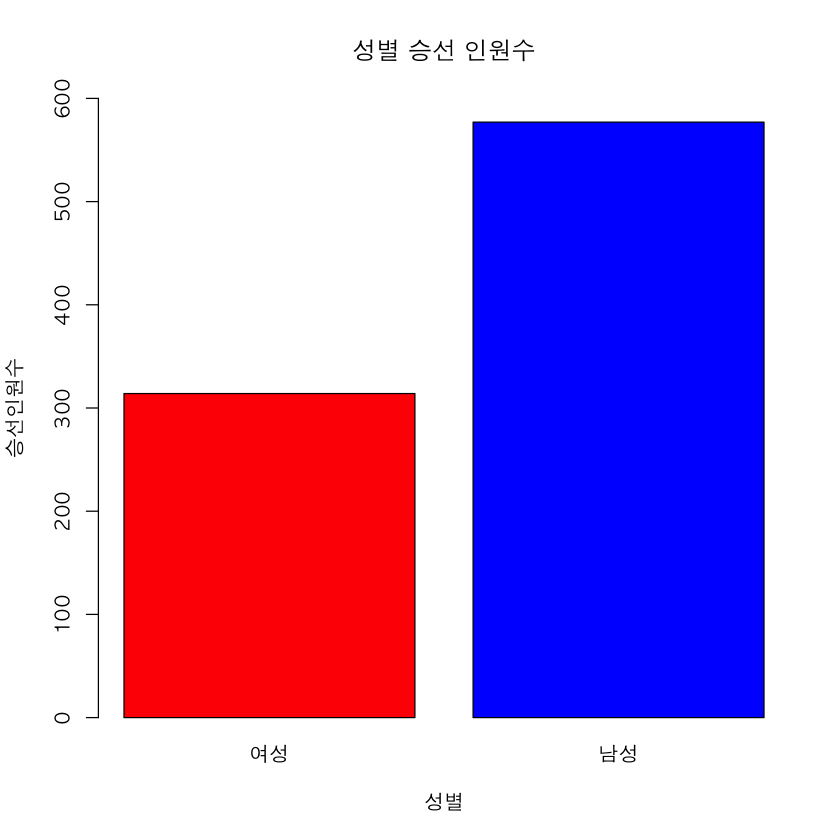

In [215]:
# 남녀 승선 인원수를 막대 그래프로 시각화 

par(family = "AppleGothic")
options(scipen = 100) # 지수 지우기

total.count<- c(femaleCount, maleCount)

barplot(total.count,
        beside =T,
        main = '성별 승선 인원수',
        ylim = c(0,600),
        col = c('red', 'blue' ),
        xlab = '성별',
        ylab = '승선인원수',
        names = c('여성','남성')
       )

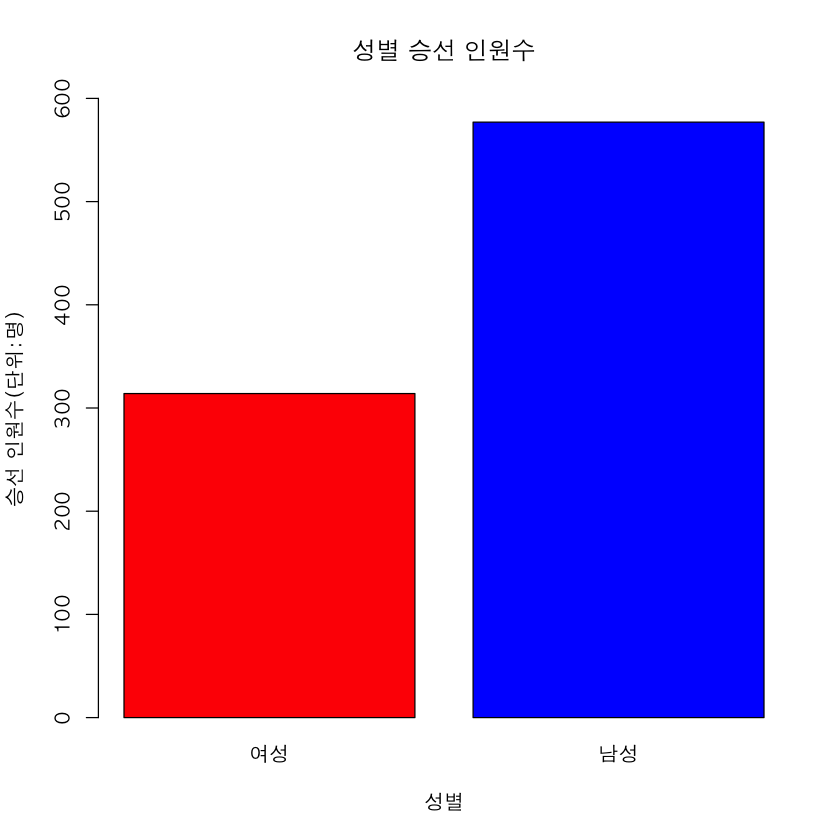

In [218]:
# 남녀 승선 인원수를 막대 그래프로 시각화 
par(family = "AppleGothic")

barplot(table(train_df$Sex),
        main = '성별 승선 인원수',
        xlab = "성별",
        ylab = '승선 인원수(단위:명)',
        ylim = c(0,600),
        col = c("red", "blue"),
        names = c("여성", "남성")
       )

# 여기까지 해본결과
[Survived] <- [Sex]

In [220]:
# 다음으로 찾을것을 하러 가자!!
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


### 티켓 등급 분석

In [222]:
# 컬럼의 속성 파악
table(train_df$Pclass)


  1   2   3 
216 184 491 

# 3가지를 연결해서 봐야한다
# Suvived, Sex, Pclass

In [245]:
# 1등 객실의 여성 생존율은?
firstWomen <- nrow(subset(train_df, Pclass == "1" & Survived == "1" & Sex == "female"))
firstWomen
ffPclass <- nrow(subset(train_df, Pclass == "1" & Sex == "female"))
paste("1등 객실의 여성 생존율은",firstWomen,"/",ffPclass,",",round(firstWomen / ffPclass * 100, 2), "%")

[1] 91

[1] "1등 객실의 여성 생존율은 91 / 94 , 96.81 %"

In [247]:
# 1등 객실의 여성 생존율은?  - Teacher
femaleCount1st <- nrow(subset(train_df, Sex =="female" & Pclass == 1))
femaleLiveCount1st <- nrow(subset(train_df, Sex =="female" & Pclass == 1 & Survived == 1))

cat("1등 객실의 여성 생존율은", femaleLiveCount1st, "/", femaleCount1st, ",", round(femaleLiveCount1st / femaleCount1st
                                                                         * 100 , 2) , "%" , "\n") 

1등 객실의 여성 생존율은 91 / 94 , 96.81 % 


In [262]:
# 1,2,3등 객실의 여성 생존율을 for문을 이용해 해결


for (i in 1:3){
    femaleCount <- nrow(subset(train_df, Sex =="female" & Pclass == i))
    femaleLiveCount <- nrow(subset(train_df, Sex =="female" & Pclass == i & Survived == 1))

    cat(i, "등 객실의 여성 생존율은", femaleLiveCount, "/", femaleCount, ",", round(femaleLiveCount / femaleCount
                                                                             * 100 , 2) , "%" , "\n") 
}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 


In [259]:
# 1등 객실의 남성 생존율은?  - Teacher
maleCount1st <- nrow(subset(train_df, Sex =="male" & Pclass == 1))
maleLiveCount1st <- nrow(subset(train_df, Sex =="male" & Pclass == 1 & Survived == 1))

cat("1등 객실의 남성 생존율은", maleLiveCount1st, "/", maleCount1st, ",", round(maleLiveCount1st / maleCount1st
                                                                         * 100 , 2) , "%" , "\n") 

1등 객실의 남성 생존율은 45 / 122 , 36.89 % 


In [263]:
# 1,2,3등 객실의 여성 생존율을 for문을 이용해 해결

for (i in 1:3){
    maleCount <- nrow(subset(train_df, Sex =="male" & Pclass == i))
    maleLiveCount <- nrow(subset(train_df, Sex =="male" & Pclass == i & Survived == 1))

    cat(i, "등 객실의 남성 생존율은", maleLiveCount, "/", maleCount, ",", round(maleLiveCount / maleCount
                                                                             * 100 , 2) , "%" , "\n") 
}

1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 


In [273]:
# 1,2,3등 객실의 남성과 여성의 생존율 이중 for문을 통해 해결 
for (gender in c("female", "male")){
    for (i in 1:3){
        maleCount <- nrow(subset(train_df, Sex ==gender & Pclass == i))
        maleLiveCount <- nrow(subset(train_df, Sex ==gender & Pclass == i & Survived == 1))

        cat(i, "등 객실의",gender ,"생존율은", maleLiveCount, "/", maleCount, ",", round(maleLiveCount / maleCount
                                                                                 * 100 , 2) , "%" , "\n") 
        }
    cat("-------------------------------------------------------------------------\n")
}

1 등 객실의 female 생존율은 91 / 94 , 96.81 % 
2 등 객실의 female 생존율은 70 / 76 , 92.11 % 
3 등 객실의 female 생존율은 72 / 144 , 50 % 
-------------------------------------------------------------------------
1 등 객실의 male 생존율은 45 / 122 , 36.89 % 
2 등 객실의 male 생존율은 17 / 108 , 15.74 % 
3 등 객실의 male 생존율은 47 / 347 , 13.54 % 
-------------------------------------------------------------------------


In [275]:
# 1,2,3등 객실의 남성과 여성의 생존율 이중 for문을 통해 해결 
# female과 male을 여성과 남성으로 변경 
for (gender in c("female", "male")){
    for (i in 1:3){
        maleCount <- nrow(subset(train_df, Sex ==gender & Pclass == i))
        maleLiveCount <- nrow(subset(train_df, Sex ==gender & Pclass == i & Survived == 1))

        cat(i, "등 객실의",ifelse(gender == "female", "여성", "남성") ,"생존율은", maleLiveCount, "/", maleCount, ",", round(maleLiveCount / maleCount
                                                                                 * 100 , 2) , "%" , "\n") 
        }
    cat("-------------------------------------------------------------------------\n")
}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 
-------------------------------------------------------------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 
-------------------------------------------------------------------------


In [332]:
# 위의 생존율들을 그래프로 만들어야겠다??
# 1,2,3등 객실의 남성과 여성 생존율을 벡터로 담아내기!!

#--> 벡터 초기화를 해야한다.! 
maleData <- c()
femaleData <- c()

for (gender in c("female", "male")){
    for (i in 1:3){
        maleCount <- nrow(subset(train_df, Sex ==gender & Pclass == i))
        maleLiveCount <- nrow(subset(train_df, Sex ==gender & Pclass == i & Survived == 1))

        cat(i, "등 객실의",ifelse(gender == "female", "여성", "남성") ,"생존율은", maleLiveCount, "/", maleCount, ",", round(maleLiveCount / maleCount
                                                                                 * 100 , 2) , "%" , "\n") 
        
        if (gender == "female"){
            femaleData[i] = round(maleLiveCount / maleCount * 100 , 2) 
        }else{
            maleData[i] = round(maleLiveCount / maleCount * 100 , 2) 
        }
        }
    cat("-------------------------------------------------------------------------\n")
}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 % 
2 등 객실의 여성 생존율은 70 / 76 , 92.11 % 
3 등 객실의 여성 생존율은 72 / 144 , 50 % 
-------------------------------------------------------------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 % 
2 등 객실의 남성 생존율은 17 / 108 , 15.74 % 
3 등 객실의 남성 생존율은 47 / 347 , 13.54 % 
-------------------------------------------------------------------------


In [333]:
maleData

[1] 36.89 15.74 13.54

In [337]:
femaleData


[1] 96.81 92.11 50.00

ERROR: Error in eval(expr, envir, enclos): 객체 'femlaleData'를 찾을 수 없습니다


In [339]:
vecData <- c(femaleData, maleData)
vecData[1]

[1] 96.81

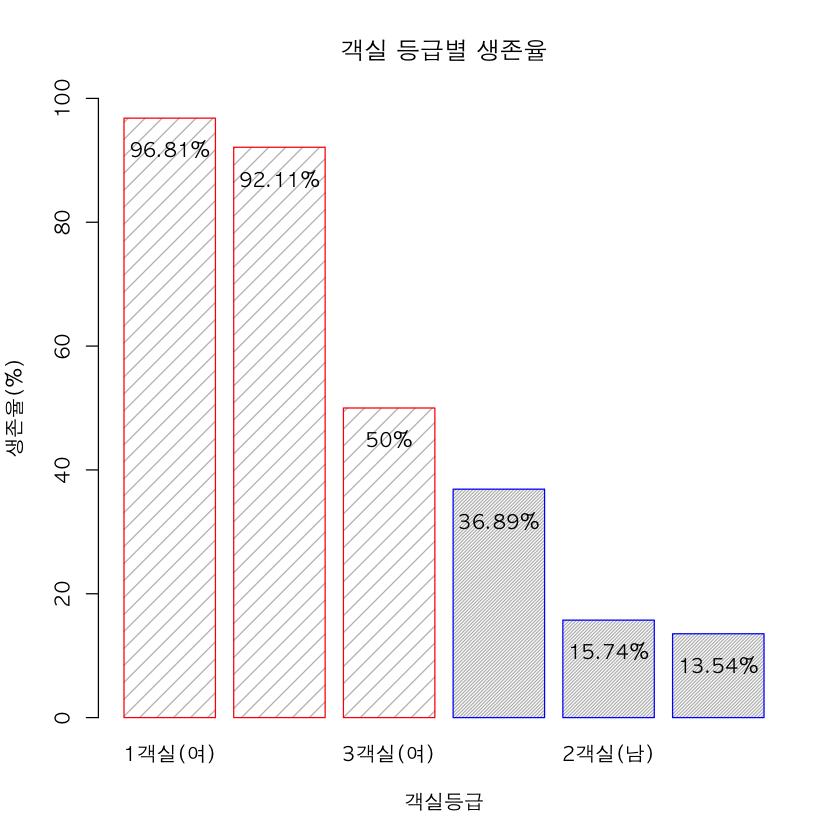

In [351]:
par(family = "AppleGothic")
options(scipen = 100) # 지수 지우기
options(warn = -1)


barplot(vecData,
        main = "객실 등급별 생존율",
        xlab = "객실등급",
        ylab = "생존율(%)",
        ylim  = c(0,100),
        names = c("1객실(여)", "2객실(여)", "3객실(여)","1객실(남)", "2객실(남)", "3객실(남)"),
        border = c(rep("red",3),rep("blue",3)),
        density = c(rep(10,3),rep(50,3))
       )
loc <- 0.7

for (i in 1:length(vecData)){
    text(loc,vecData[i]-5 , paste(vecData[i], "%", sep = ""))
    loc = loc + 1.2
}




[Survived] <- [Sex, Pclass]
# 최소한 3개의 데이터는 들어가야 한다.